$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 4: Classification with LDA and Logistic Regression

Bradley Pospeck

## Overview

In this assignment, two different data sets will be analyzed using multiple classification algorithms. One of the data sets will be various 3x3 image segments taken from outdoor images. The other is just different types of glasses based on composition. The algorithms used will be Linear Discriminant Analysis, Linear Logistic Regression, and Nonlinear Logistic Regression

### Linear Discriminant Analysis (LDA)
LDA will be the first classification algorithm used. LDA is based on normal distributions for modeling. The discriminant function can be derived from the discriminant function used in Quadratic Discriminant Analysis (QDA).

Here is the QDA discriminant function: 

$$
      \begin{align*}
        \delta_k(\xv) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(\xv-\muv_k)^T
        \Sigma_k^{-1} (\xv-\muv_k) + \ln P(C=k)
      \end{align*}
$$

When we compare discriminant functions, $\delta_2(\xv) > \delta_1(\xv)$, and use the same
covariance matrix $\Sigmav$ for every class, we get

$$
      \begin{align*}
        -\frac{1}{2} & \ln |\Sigma| +
        -\frac{1}{2}(\xv-\muv_2)^T \Sigma^{-1} (\xv-\muv_2) + \ln p(C=2) 
        \\ & > -\frac{1}{2} \ln |\Sigma| +
        -\frac{1}{2}(\xv-\muv_1)^T \Sigma^{-1} (\xv-\muv_1) + \ln p(C=1) 
      \end{align*}
$$

which can be simplified to

$$
      \begin{align*}
        -\frac{1}{2}(\xv-\muv_2)^T \Sigma^{-1} (\xv-\muv_2) + \ln p(C=2) 
        & > -\frac{1}{2}(\xv-\muv_1)^T \Sigma^{-1} (\xv-\muv_1) + \ln p(C=1) \\
        \xv^T \Sigmav^{-1} \muv_1 - \frac{1}{2}\muv_1^T \Sigmav^{-1} \muv_1 + \log
        P(C=1) 
        &> \xv^T \Sigmav^{-1} \muv_2 - \frac{1}{2}\muv_2^T \Sigmav^{-1} \muv_2
        + \log P(C=2)
      \end{align*}
$$


So, our discriminant function has become

$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \Sigmav^{-1} \muv_k - \frac{1}{2}\muv_k^T \Sigmav^{-1} \muv_k + \log
        P(C=k)
      \end{align*}
$$

This is linear in $\xv$, hence and can be written as

$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \wv_k + \text{constant}_k
      \end{align*}
$$

And now we have our LDA discriminant function.

### Logistic Regression
Let's start with the general form of the gradient of the log likelihood equation that both linear and nonlinear logistic regression are based on:
$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

#### Linear
For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$
or, as matrices, and using the mean log likelihood,

$$
    \begin{align*}
    Y &= g(\Xv)\\
    LL(\wv) & = \text{np.mean}(T \cdot \log Y , \text{axis}=0) \\
      \grad_{\wv_j} LL(\wv) & =  \Xv^T (T - Y) \;/\; (N\,K)
    \end{align*}
$$

where

$$
    \begin{align*}
    f(\Xv;\wv) & = e^{\Xv \wv}\\
    g(\Xv) & = \frac{f(\Xv;\wv)}{\text{rowSums}(f(\Xv;\wv)}
    \end{align*}
$$

#### Nonlinear
Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Modified equations for neural networks will be used to achieve Nonlinear Logistic Regression. This is because $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ were already calculated with neural networks. The expressions used to minimize the mean squared error with neural networks is shown below:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

***Note: Most of the math and descriptions used above were from lecture notes 14-16.***

## Imports

In [14]:
import numpy as np
import mlutils as ml
import neuralnetworks as nn
import qdalda as ql
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [15]:
"""trainLDA performs training via Linear Discriminant Analysis and takes 3 inputs: 
input values, X, target values, T, and parameters.
parameters is not used, but is necessary since it gets passed to 'trainValidateTestKFoldsClassification' which 
requires input training functions to have parameters. trainLDA simply returns the trained LDA model"""
def trainLDA(X,T,parameters=0):
    lda = ql.LDA()
    lda.train(X,T)
    return lda

"""evaluateLDA takes the model from trainLDA along with both X and T matrices in order to calculate and return
the percent of the classifications that were correct."""
def evaluateLDA(model,X,T):
    predicted,_,_ = model.use(X)
    percentCorrect = ml.percentCorrect(predicted,T)
    return percentCorrect

"""trainNN takes the same inputs as trainLDA, except that parameters is actually used. The parameters option has 2 parts:
hidden units structure and number of iterations for the Scaled Conjugate Gradient method. Neural networks are then used 
to perform either linear or nonlinear logistic regression. The only time it performs linear logistic regression is when 
the hidden units structure = 0. trainNN simply returns the neural network classifier model that was trained."""
def trainNN(X,T,parameters):
    nnet = nn.NeuralNetworkClassifier(X.shape[1],parameters[0],np.unique(T).shape[0])
    nnet.train(X,T,nIterations=parameters[1])
    return nnet

"""evaluateNN takes the same inputs as evaluateLDA, except that the input model is from trainNN. It also returns the 
percent of the classifications that were correct."""
def evaluateNN(model,X,T):
    predicted = model.use(X)
    percentCorrect = ml.percentCorrect(predicted,T)
    return percentCorrect

"""Just a convenient function that prints out the results from 'trainValidateTestKFoldsClassification' formatted nicely."""
def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))

"""Plots the means of each attribute in each class of a given data set against each other for comparison. Input parameter
is just entire set of means from a particular data set."""
def plotLdaMeans(means,classNames):
    count = 0
    for imgClass in lda.mu:
        if(count ==0):
            classMeans = np.array(imgClass)
            count = 1
        else:
            classMeans = np.hstack((classMeans,np.array(imgClass)))
    d = {}
    dVal = 0
    for className in classNames:
        d[className]=dVal
        dVal +=1
    plt.figure(figsize=(10,10))
    rows, cols=classMeans.shape
    for className,c in d.items():
        #className = revImageSegs[c]
        plt.plot(classMeans[:,c],'o',label='Class: ' + className)
        plt.legend(loc = 'best')
        plt.ylabel('Means')
        plt.xlabel('Attributes')
        plt.xticks(np.arange(0,rows,1))

"""Find the parameters that ended up being best most often from logistic regressions. Return those parameters."""
def findCommonParams(resultsNN):
    paramList = []
    for row in resultsNN:
        paramList.append(row[0])
    common = []
    commCount = 0
    prevCount = 0
    for row in resultsNN:
        commCount = paramList.count(row[0])
        if commCount > prevCount:
            common = row[0]
            prevCount = commCount 
    return common

## Image Segmentation Data

The first data set can be found [here](http://archive.ics.uci.edu/ml/datasets/Image+Segmentation) and involves image segmentation of outdoor pictures. The segmented sections are 3x3 sections of pixels and classified as 1 of 7 classes:
    
    1. Brickface
    2. Sky
    3. Foliage
    4. Cement
    5. Window
    6. Path
    7. Grass

There are 330 instances of each class in the data, adding to a total of 2310 samples. Hopefully, the even spread of each class will help the classifiers do well. There are a total of 19 attributes as follows:

    1.  region-centroid-col:  the column of the center pixel of the region.
    2.  region-centroid-row:  the row of the center pixel of the region.
    3.  region-pixel-count:  the number of pixels in a region = 9.
    4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or equal to 5, go through the region.
    5.  short-line-density-2:  same as short-line-density-5 but counts lines
         of high contrast, greater than 5.
    6.  vedge-mean:  measure the contrast of horizontally
         adjacent pixels in the region.  There are 6, the mean and 
         standard deviation are given.  This attribute is used as
        a vertical edge detector.
    7.  vegde-sd:  (see 6)
    8.  hedge-mean:  measures the contrast of vertically adjacent
          pixels. Used for horizontal line detection. 
    9.  hedge-sd: (see 8).
    10. intensity-mean:  the average over the region of (R + G + B)/3
    11. rawred-mean: the average over the region of the R value.
    12. rawblue-mean: the average over the region of the B value.
    13. rawgreen-mean: the average over the region of the G value.
    14. exred-mean: measure the excess red:  (2R - (G + B))
    15. exblue-mean: measure the excess blue:  (2B - (G + R))
    16. exgreen-mean: measure the excess green:  (2G - (R + B))
    17. value-mean:  3-d nonlinear transformation
         of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
         of Interactive Computer Graphics)
    18. saturation-mean:  (see 17)
    19. hue-mean:  (see 17)
    
The data provided from the site is split between training and testing data. Since the splitting is done in code, I combined the 2 files into one before reading in the data below. The 3rd attribute, `region-pixel-count`, needs to be removed from the data before analysis.

In [16]:
imageSegs = {'BRICKFACE':0,'SKY':1,'FOLIAGE':2,'CEMENT':3,'WINDOW':4,'PATH':5,'GRASS':6}
revImageSegs = {0:'Brickface',1:'Sky',2:'Foliage',3:'Cement',4:'Window',5:'Path',6:'Grass'}
classNames = ['Brickface','Sky','Foliage','Cement','Window','Path','Grass']
#for key in imageSegs.keys():
#    print(key)

In [17]:
def bs(bytes):
    '''Convert bytes to string and remove double quotes'''
    # print(bytes)
    return str(bytes,'utf-8').replace('"','')

In [18]:
converters = {0: lambda s: float(imageSegs[bs(s)])}

In [19]:
X = np.loadtxt('segmentation.data',delimiter=',',usecols=range(1,20))
T = np.genfromtxt('segmentation.data',delimiter=',',usecols=(0), converters=converters)
X,T

(array([[ 140.        ,  125.        ,    9.        , ...,    7.7777777 ,
            0.5456349 ,   -1.1218182 ],
        [ 188.        ,  133.        ,    9.        , ...,    8.444445  ,
            0.53858024,   -0.92481726],
        [ 105.        ,  139.        ,    9.        , ...,    7.5555553 ,
            0.5326279 ,   -0.96594584],
        ..., 
        [ 128.        ,  161.        ,    9.        , ...,   10.888889  ,
            0.5409177 ,   -1.9963073 ],
        [ 150.        ,  158.        ,    9.        , ...,   12.222222  ,
            0.50308645,   -1.9434487 ],
        [ 124.        ,  162.        ,    9.        , ...,   14.555555  ,
            0.4799313 ,   -2.0293121 ]]),
 array([ 0.,  0.,  0., ...,  3.,  3.,  3.]))

In [20]:
X.shape,T.shape

((2310, 19), (2310,))

Need to fix the dimensionality of T.

In [21]:
T = np.atleast_2d(T)
T = np.transpose(T)
T.shape,T

((2310, 1), array([[ 0.],
        [ 0.],
        [ 0.],
        ..., 
        [ 3.],
        [ 3.],
        [ 3.]]))

Next, I need to remove the 3rd column from X to eliminate the `region-pixel-count` column.

In [22]:
X = np.hstack((X[:,0:2],X[:,3:]))
X.shape,X

((2310, 18), array([[  1.40000000e+02,   1.25000000e+02,   0.00000000e+00, ...,
           7.77777770e+00,   5.45634900e-01,  -1.12181820e+00],
        [  1.88000000e+02,   1.33000000e+02,   0.00000000e+00, ...,
           8.44444500e+00,   5.38580240e-01,  -9.24817260e-01],
        [  1.05000000e+02,   1.39000000e+02,   0.00000000e+00, ...,
           7.55555530e+00,   5.32627900e-01,  -9.65945840e-01],
        ..., 
        [  1.28000000e+02,   1.61000000e+02,   0.00000000e+00, ...,
           1.08888890e+01,   5.40917700e-01,  -1.99630730e+00],
        [  1.50000000e+02,   1.58000000e+02,   0.00000000e+00, ...,
           1.22222220e+01,   5.03086450e-01,  -1.94344870e+00],
        [  1.24000000e+02,   1.62000000e+02,   1.11111110e-01, ...,
           1.45555550e+01,   4.79931300e-01,  -2.02931210e+00]]))

In [23]:
Xnames = ['region-centroid-col','region-centroid-row','short-line-density-5','short-line-density-2',
         'vedge-mean','vedge-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean',
         'exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean']
Tname = 'Image segment class'

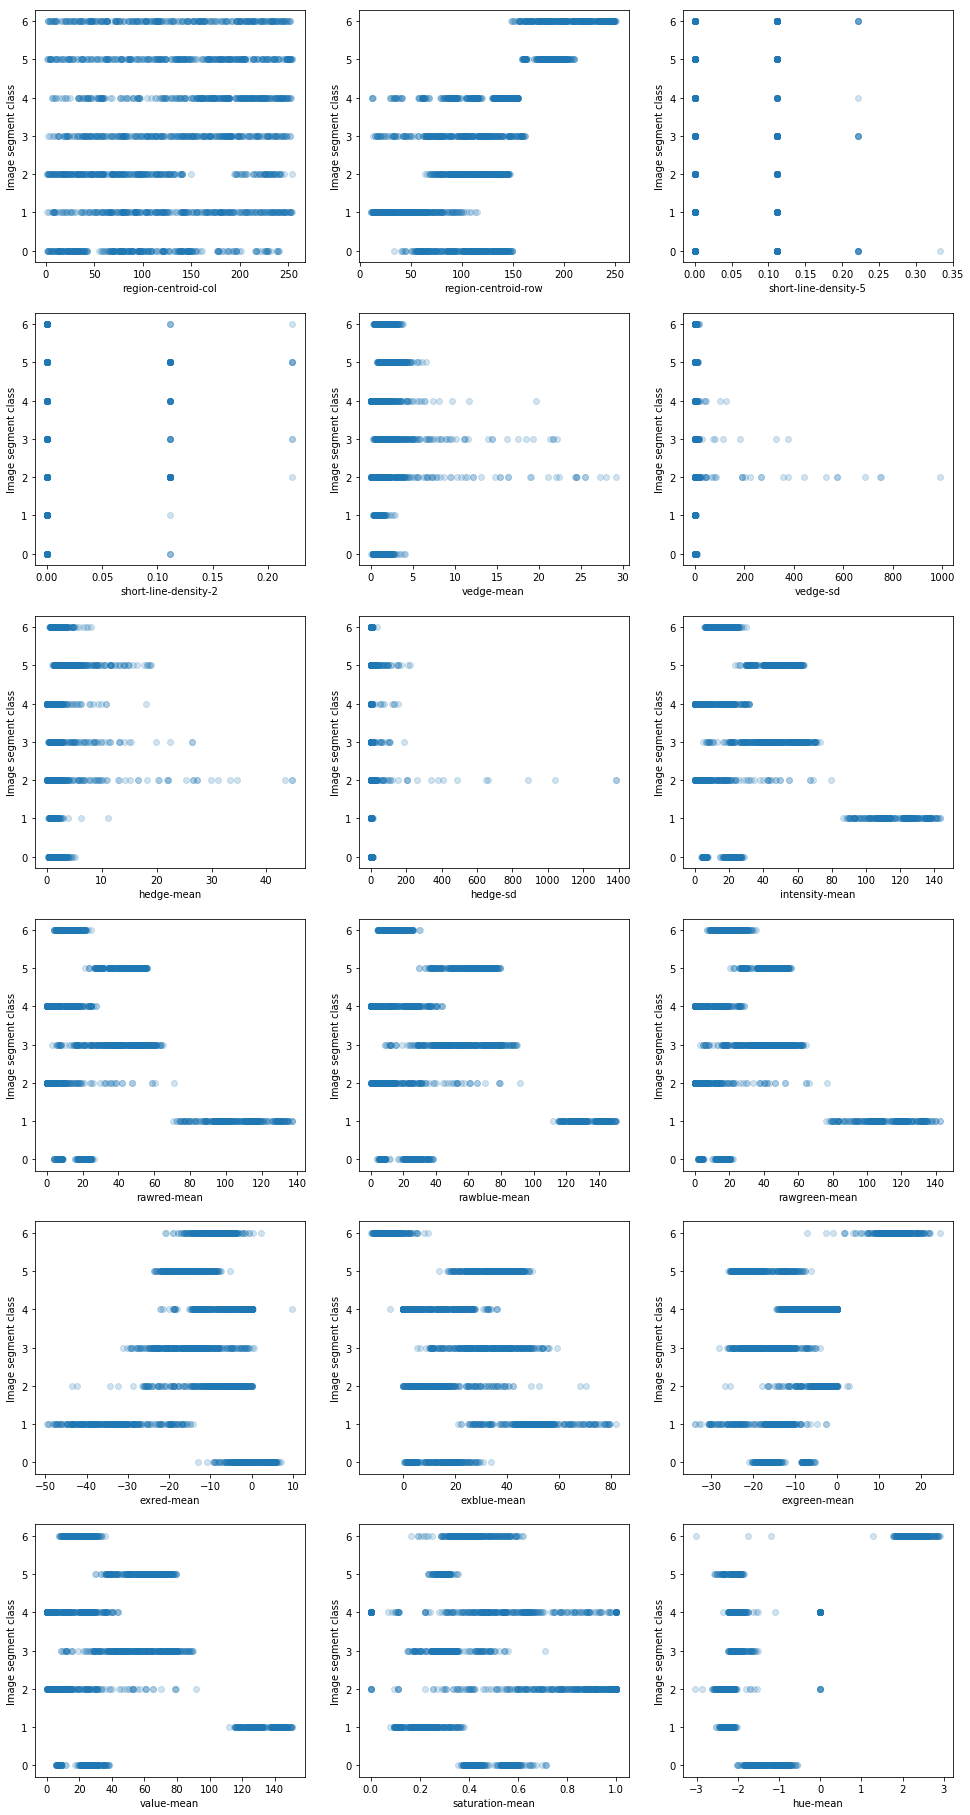

In [24]:
plt.figure(figsize=(10,10))
rows, cols=X.shape
for c in range(cols):
    plt.subplot(7,3, c+1)
    plt.plot(X[:,c],T,'o',alpha=.2)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])
        # formatting space around the figures
    plt.subplots_adjust(right=1.4)
    plt.subplots_adjust(top=3)

On initial inspection, a lot of the groupings make sense. Brickface tends to have high red hues, while grass has high green hues, and sky has high blue hues. So the data makes sense. With the dataset's even distribution and fairly high sample size, I expect the classifiers will do fairly well.

## Image Segmentation Results

### LDA

In [25]:
resultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, X,T, [None],
                                                       nFolds=6, shuffle=False,verbose=False)
printResults('LDA:',resultsLDA)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   92.16   90.09   95.91
LDA:                 None   92.61   90.52   94.71
LDA:                 None   92.73   90.32   94.18
LDA:                 None   92.99   90.59   93.94
LDA:                 None   93.84   91.31   85.91
LDA:                 None   94.18   92.84   81.30


Overall, LDA looks to have done a fairly good job. Most of the time, the test accuracy was 94% or higher, with only 2 being less at about 86% and 81%. It is difficult to find out just how well LDA did by only seeing the percent corrrect however. The confusion matrix should display some more useful information.

In [26]:
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T));

       0    1    2    3    4    5    6
    ------------------------------------------
 0 | 98.5  0    0    0    1.5  0    0     (330 / 330)
 1 |  0  100.0  0    0    0    0    0     (330 / 330)
 2 |  0.6  0   89.1  0.9  9.4  0    0     (330 / 330)
 3 |  0    0    0   82.7 10.6  6.7  0     (330 / 330)
 4 |  0.6  0   21.5  5.5 72.4  0    0     (330 / 330)
 5 |  0    0    0    0    0  100.0  0     (330 / 330)
 6 |  0    0    0    0    0.3  0.6 99.1   (330 / 330)


Both *Cement*, and *Foliage* were predicted accurately 100% of the time. *Path* was just barely behind at 99.1%. This is somewhat surprising. Initially I expected *Path* to have a lot in common with *Cement*. I thought path would refer to something like a sidewalk. Looking at the large differences in attributes in the graphs above, there is very little in common between the 2 classes. Maybe the *Path* class data is something like a dirt path instead, with lots of brown colors. That could explain part of why both *Path* and *Cement* were classified accurately. Both have fairly distinct colors, gray and brown, that I wouldn't expect to show up a lot in the other classes. Perhaps the same logic applies to the 98.5% accuracy in classifying *Brickface* since brick has red colors that aren't likely present elsewhere. 

Applying the same train of thought to *Sky* does not seem to work however. Normally sky would be blue, and that would be fairly distinct from the other classes' colors. There may be a couple of reasons for the lower accuracy rate of 82.7%. It is possible that some sky image segments contained clouds, or even the sun. This would spread the color spectrum out and make it easier to confuse with other classes. A second reason is because of the *Window* class being picked incorrectly by LDA 10.6% of the time. The window image segments captured may have included a sky in the background. Generally speaking, any number of things could have been beyond the window which is likely the cause of the relatively low accuracy rate.

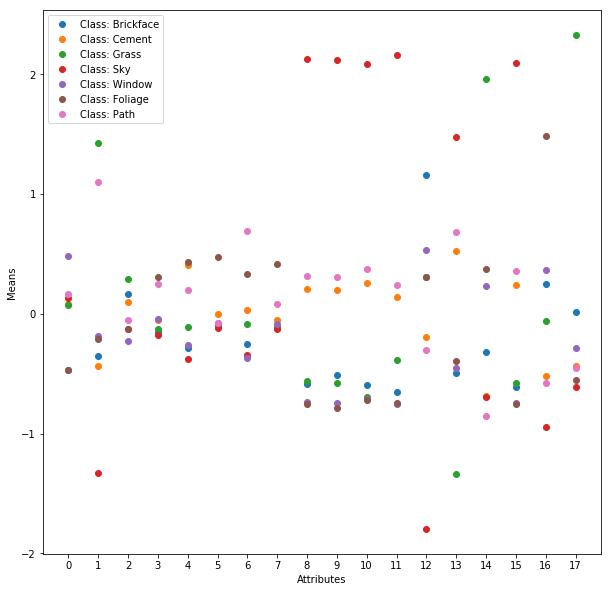

In [27]:
plotLdaMeans(lda.mu,classNames)

What jumps out initially from the plot of class means vs. their attributes, is how often *Sky* attribute means are outliers compared to the other means. Upon closer inspection, this outlying behavior happens in roughly half of the attributes, while the other half tend to be clustered tightly with other class means. Clustered class means are likely a contributing factor in LDA classification confusion. This is further supported by both the *Grass* and *Window* classes appearing to have means clustered more often than any others.

On the other end, the 2 best classified: *Cement* and *Foliage*, look like their means tend to have separation from other classes most consistently.

### Logistic Regression

The below list contains a variety of parameters for logistic regression classification. The first part of each parameter is the hidden layer structure: A single value of 0 will run linear logistic regression; Non-zero values specificy the number of units in a layer. The second part of each parameter is the number of iterations that scaled conjugate gradient will perform.

In [28]:
nnParams = [ [[0],10], [[0],100], [[0],1000], 
            [[10],100], [[100],100], 
            [[10,10],10], [[10,10],100], 
            [[10,2,10],10], [[10,2,10],100] ] 

In [29]:
resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     nnParams,
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',resultsNN)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:      [[10, 10], 100]   98.51   94.63   98.94
 NN:         [[100], 100]   99.53   96.49   98.51
 NN:         [[100], 100]   99.77   96.58   97.64
 NN:         [[100], 100]   99.85   96.00   97.78
 NN:         [[100], 100]   99.81   96.45   97.05
 NN:         [[100], 100]   99.56   97.85   89.35


Nonlinear Logistic Regression produced the best validation accuracy every time. Interestingly enough, the exact same parameter was the best 5/6 times. This parameter was one hidden layer with 100 units and 100 iterations. The test accuracy is pretty impressive across the board, with all but one of the results being roughly 98% accurate. This outperformed LDA by a fairly sizeable margin, given the reasonably strong results from LDA to begin with.

4.02543236623 0.000948947165008 369.822485207


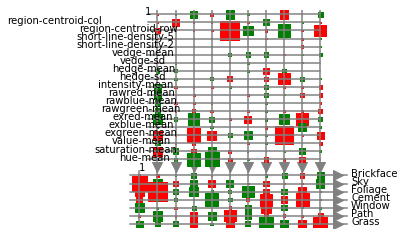

In [30]:
common = findCommonParams(resultsNN)
nnet = nn.NeuralNetworkClassifier(X.shape[1],[10],np.unique(T).shape[0])
nnet.train(X,T,nIterations=common[1])
nnet.draw(Xnames,classNames)

Region-centroid-row, exgreen-mean, exred-mean, and to a lesser extent hue-mean were given the highest importance most consistently. This could mean that those are the most distinguishing features when deciding the differences between each class.  In the input layer, roughly half of those were correlated positively. 

There are not really any attributes given little to no importance in all but one unit. For the most part, if any attributes is given any weight, it is given similar weights across the board. The output layer is largely the same way. It is interesting to see the first hidden unit correlate largely negatively with *Foliage*, when most of the units correlate positively overall with it. 

## Glass Data

The 2nd set of data can be found [here](http://archive.ics.uci.edu/ml/datasets/Glass+Identification) and has 214 data points for glass identification based on composition and a refractive index. The attributes are as follows:

    1. Id number: 1 to 214 
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium 
    8. Ca: Calcium 
    9. Ba: Barium 
    10. Fe: Iron
    11. Type of glass

Since the 1st attribute is just an identification number, I will be leaving that out of the analysis, leaving me with only 10 attributes. The types of glass range from 1-7 and are setup like this:

    1. building_windows_float_processed
    2. building_windows_non_float_processed
    3. vehicle_windows_float_processed
    4. vehicle_windows_non_float_processed
    5. containers
    6. tableware
    7. headlamps
    

In [32]:
classNames = ['Building windows-float processed','Building windows-non-float processed','Vehicle windows-float processed',
             'Vehicle windows-non-float processed','Containers','Tableware','Headlamps']

In [33]:
glass = np.loadtxt('glass.data',delimiter=',',usecols=range(1,11))
glass

array([[  1.52101,  13.64   ,   4.49   , ...,   0.     ,   0.     ,   1.     ],
       [  1.51761,  13.89   ,   3.6    , ...,   0.     ,   0.     ,   1.     ],
       [  1.51618,  13.53   ,   3.55   , ...,   0.     ,   0.     ,   1.     ],
       ..., 
       [  1.52065,  14.36   ,   0.     , ...,   1.64   ,   0.     ,   7.     ],
       [  1.51651,  14.38   ,   0.     , ...,   1.57   ,   0.     ,   7.     ],
       [  1.51711,  14.23   ,   0.     , ...,   1.67   ,   0.     ,   7.     ]])

In [34]:
X = glass[:,0:9]
T = glass[:,9:]
X,T,X.shape,T.shape

(array([[  1.52101,  13.64   ,   4.49   , ...,   8.75   ,   0.     ,   0.     ],
        [  1.51761,  13.89   ,   3.6    , ...,   7.83   ,   0.     ,   0.     ],
        [  1.51618,  13.53   ,   3.55   , ...,   7.78   ,   0.     ,   0.     ],
        ..., 
        [  1.52065,  14.36   ,   0.     , ...,   8.44   ,   1.64   ,   0.     ],
        [  1.51651,  14.38   ,   0.     , ...,   8.48   ,   1.57   ,   0.     ],
        [  1.51711,  14.23   ,   0.     , ...,   8.62   ,   1.67   ,   0.     ]]),
 array([[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
   

Looks like the data is read in correctly. Now I'll setup the names for each.

In [35]:
Xnames = ['Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe']
Tname = 'Glass Type'

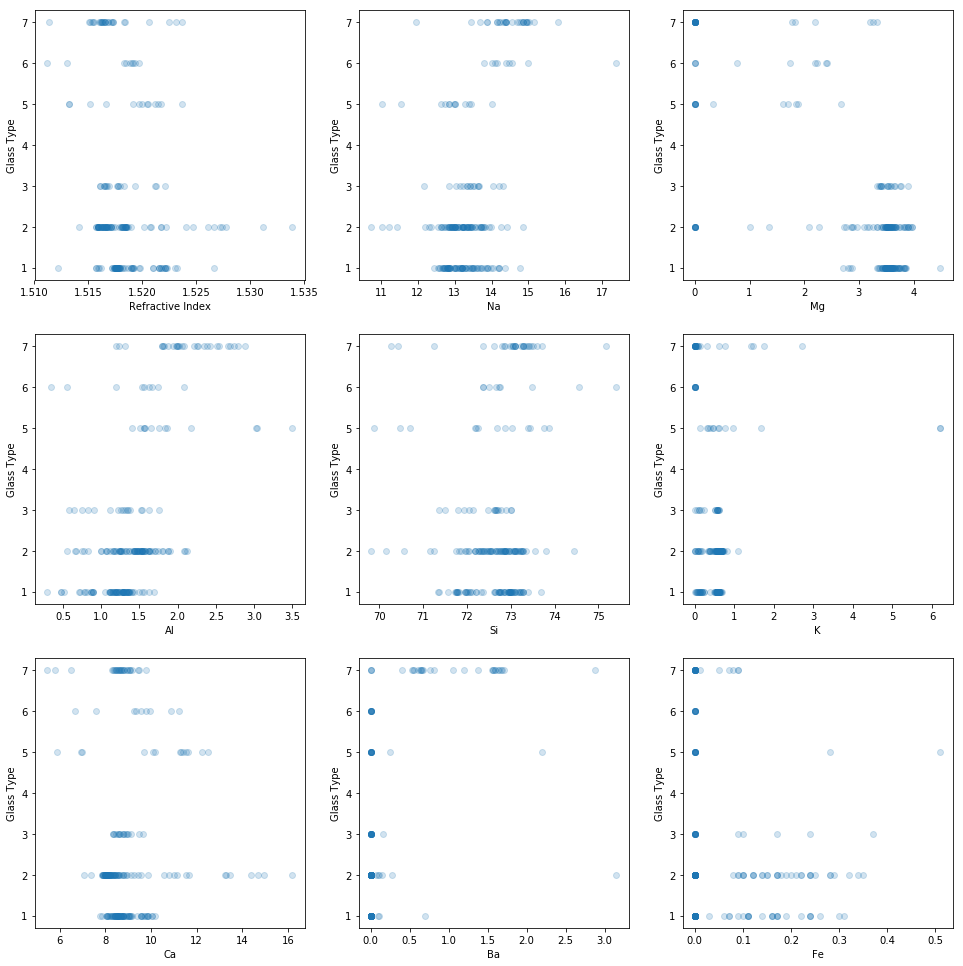

In [36]:
plt.figure(figsize=(10,10))
rows, cols=X.shape
for c in range(cols):
    plt.subplot(3,3, c+1)
    plt.plot(X[:,c],T,'o',alpha=.2)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])
        # formatting space around the figures
    plt.subplots_adjust(right=1.4)
    plt.subplots_adjust(top=1.4)

There does not appear to be any data classified as 4 (vehicle windows-non-float processed) for some reason. I'll remove it from `classNames`. Initial inspection also seems to indicate that most samples are a part of glass types 1, 2, and 7, leaving few samples for the rest. With such a small number of datapoints being spread unevenly, the classificiation may not perform well.

In [37]:
classNames.remove('Vehicle windows-non-float processed')
classNames

['Building windows-float processed',
 'Building windows-non-float processed',
 'Vehicle windows-float processed',
 'Containers',
 'Tableware',
 'Headlamps']

## Glass Results

### LDA

In [38]:
resultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, X,T, [None],
                                                       nFolds=6, shuffle=False,verbose=False)
printResults('LDA:',resultsLDA)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   70.22   64.58   64.91
LDA:                 None   72.93   67.44   66.04
LDA:                 None   73.39   70.52   69.39
LDA:                 None   74.68   69.61   73.33
LDA:                 None   71.37   65.26   75.61
LDA:                 None   71.84   70.56   59.46


Test accuracy averaged out at around 68%, with the highest reaching just under 76% and the lowest barely below 60%. These are not particularly strong results. Again, I would assume this is largely in part to the sporadic, small sample size. Another possibility contributing to inaccuracies could be that some of these classes have similar compositions. Looking at the plots above indicates some plausibility with this theory.

In [39]:
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T));

       1    2    3    5    6    7
    ------------------------------------
 1 | 67.1 20.0 12.9  0    0    0     (70 / 70)
 2 | 21.1 51.3 15.8  7.9  3.9  0     (76 / 76)
 3 | 17.6 17.6 64.7  0    0    0     (17 / 17)
 5 |  0   15.4  0   76.9  0    7.7   (13 / 13)
 6 | 11.1 11.1  0    0   77.8  0     (9 / 9)
 7 |  0    3.4  3.4  6.9  3.4 82.8   (29 / 29)


It is difficult to glean meaningful connections from the confusion matrix as every class was misclassified by a wide margin and between at least 2 or more other classes. The most distinct class looks to be *Containers* as it was classified most accurately and only one class was misclassified as *Containers*. 

Considering the large amount of misclassifications between each other, *Headlamps*, *Building windows-float processed*, and *Tableware* may have the most similarities in composition. 

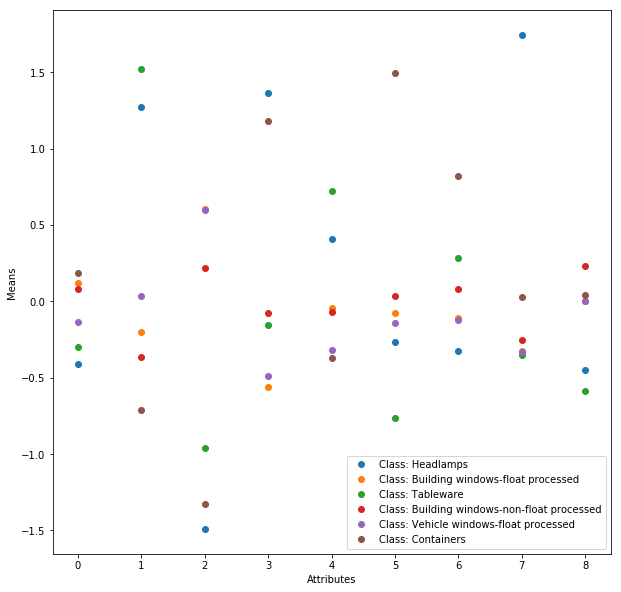

In [40]:
plotLdaMeans(lda.mu,classNames)

Plotting the means vs. attributes of each class seems to disagree with some of my previous theories on initial inspection. Both *Headlamps* and *Tableware* seem to have fairly distinct means in most of their attributes, and yet they were among the most misclassified. Notice, however, that the "Means" axis has a smaller range than the same graph for the image segments data set. THe difference in range may be large enough to make points appear more spread out than they actually are. 

Overall, most of the classes' means tend to be clustered together across all attributes, aside from refractive index and sodium content.

### Logistic Regression

In [41]:
nnParams = [ [[0],10], [[0],100], [[0],1000], 
            [[10],100], [[100],100], 
            [[10,10],10], [[10,10],100], 
            [[10,2,10],10], [[10,2,10],100] ] 

In [42]:
resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     nnParams,
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',resultsNN)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:         [[100], 100]  100.00   73.65   80.70
 NN:         [[100], 100]  100.00   74.01   79.25
 NN:         [[100], 100]  100.00   80.58   73.47
 NN:         [[100], 100]  100.00   76.21   86.67
 NN:          [[10], 100]   99.59   78.99   60.98
 NN:         [[100], 100]   99.59   76.34   78.38


76% accuracy is the rough average yielded by nonlinear logistic regression tests. Just like with the image segment data set, the exact same parameter produced the best test accuracy 5/6 times. This parameter was one hidden layer of 100 units and 100 iterations. One thing to notice is that training accuracy was nearly 100% in every single case. Even though those parameters produced the best validation error, the test accuracies are low enough that maybe there just wasn't enough data to train with. With such a small sample size, the training data may get overfit too easily and the limit on accurate tests is likely low.

Another quick thought regarding the parameters. Since the same parameters produced the best results with both data sets, maybe the logistic regression in general works best with similar parameters.

2.65432120753 0.0299020928639 566.893424036


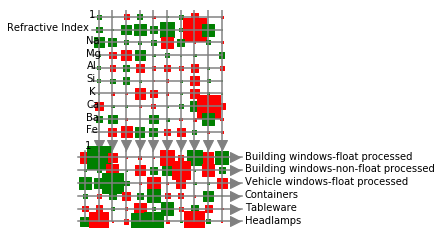

In [43]:
common = findCommonParams(resultsNN)
nnet = nn.NeuralNetworkClassifier(X.shape[1],[10],np.unique(T).shape[0])
nnet.train(X,T,nIterations=common[1])
nnet.draw(Xnames,classNames)

What sticks out immediately to me, is both refractive index and iron content in the input layer. Both are weighted relatively heavily across the board, with refractive index having particularly large weights. Other attributes that were given fairly high importance across the board are aluminum and sodium. It is possible that these 4 attributes are the best predictors of a given glass type. 

One oddity is how little weight calcium is given except for in the 9th unit where it is massively negatively correlated with the outputs. It may not actually have much importance, but could be forced that way because of the relevant importance of the aforementioned attributes.

Overall, the attributes tend to prefer the same correlation, positive or negative, across the 10 units. The outputs are a lot more sporadic.

## LDA vs. Logistic Regression

As expected, classification with this glass data set did not do particularly well with any algorithm used. However, once again, nonlinear logistic regression ended up producing the best results. This makes sense. When applying machine learning algorithms or regressions to data sets in general, linear algorithms tend to do a poor job unless the data being worked with is strictly linear. There just is not as much flexibility with linear algorithms.

## Initial Grading

In [44]:
%run -i A4grader.py


   Testing   model = trainLDA(X,T)
             accuracy = evaluateLDA(model,X,T)

20/20 points. Accuracy is within 10 of correct value 50%

   Testing   model = trainNN(X,T, [[5],100])
             accuracy = evaluateNN(model,X,T)

30/30 points. Accuracy is within 10 of correct value 100%

  Testing
    resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                          [ [ [0], 5], [ [10], 100] ],
                                                          nFolds=3, shuffle=False,verbose=False)
    bestParms = [row[0] for row in resultsNN]


30/30 points. You correctly find the best parameters to be [[10],100] for each fold.

C:\Users\Brad Pospeck\Desktop\Classes\Senior II\CS480\A4 CODING GRADE is 80/80

C:\Users\Brad Pospeck\Desktop\Classes\Senior II\CS480\A4 WRITING GRADE is ??/20

C:\Users\Brad Pospeck\Desktop\Classes\Senior II\CS480\A4 FINAL GRADE is ??/100

Remember, this python script is just an example of how